In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#03实现简单线性回归:只有一个特征

x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])


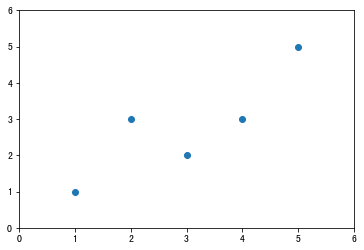

In [3]:
plt.scatter(x,y)
plt.axis([0,6,0,6])
plt.show()


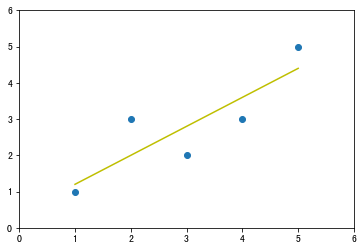

In [4]:
#求a,b
x_mean=np.mean(x)
y_mean=np.mean(y)

num=0.0   #
d=0.0
for x_i,y_i in zip(x,y):
    num+=(x_i-x_mean)*(y_i-y_mean)
    d+=(x_i-x_mean)**2
a=num/d
b=y_mean-a*x_mean

#画回归线
y_hat=a*x+b
plt.scatter(x,y)
plt.axis([0,6,0,6])
plt.plot(x,y_hat,color='y')
plt.show()



In [5]:
#预测
x_predict=7
y_predict=a*x_predict+b
y_predict



6.0

In [8]:
#04向量化计算加快速度

from SimpleLinearRegression_1 import SimpleLinearRegression1
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

reg1 = SimpleLinearRegression1()
reg1.fit(x, y)
reg1.predict(np.array([x_predict]))


array([6.])

In [7]:
from SimpleLinearRegression_1 import SimpleLinearRegression2

reg2 = SimpleLinearRegression2()
reg2.fit(x, y)
reg2.predict(np.array([x_predict]))

array([6.])

In [9]:
#测试两种方式计算速度
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2 + 3 + np.random.normal(size=m)
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

659 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.75 ms ± 79.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
#05-06模型评价指标
#MSE
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston=datasets.load_boston()

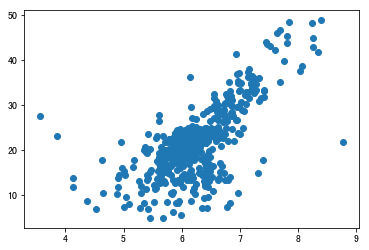

In [25]:
#数据预处理
x=boston.data[:,5]
y=boston.target

x=x[y<50.0]    #去掉边缘异常值
y=y[y<50.0]
plt.scatter(x,y)


In [34]:
#分离训练集、测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=666)
x_train.shape
y_train.shape
#拟合
from SimpleLinearRegression_1 import SimpleLinearRegression2
reg=SimpleLinearRegression2()
reg.fit(x_train,y_train)

SimpleLinearRegression2()

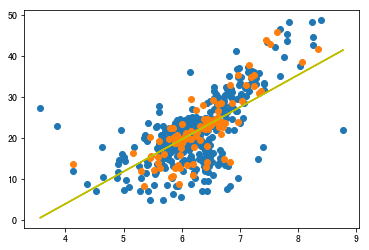

In [42]:
reg.a_
reg.b_
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.plot(x_train,reg.predict(x_train),color='y')


In [50]:
#MSE
y_predict=reg.predict(x_test)
mse_test=np.sum((y_predict-y_test)**2)/len(y_test)
#RMSE
from math import sqrt
rmse_test=sqrt(mse_test)
rmse_test


4.914936635846635

In [52]:
#R**2,使用本地底层
from metrics import mean_squared_error
1-mean_squared_error(y_test,y_predict)/np.var(y_test)


0.6129316803937322

In [54]:
#使用sklearn包
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6129316803937324

In [1]:
#多元回归

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
boston=datasets.load_boston()
X=boston.data
y=boston.target

X=X[y<50.0]    #去掉边缘异常值
y=y[y<50.0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=666)



In [7]:
#利用本地底层多元拟合

from LinearRegression_1 import LinearRegression
reg=LinearRegression()
reg.fit_normal(X_train,y_train)
reg.coef_
reg.intercept_
reg.predict(X_test)
reg.score(X_test,y_test)

0.8129802602658359

In [8]:
#利用sklearn库进行回归
from sklearn.linear_model import LinearRegression

sk_reg=LinearRegression()
sk_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
sk_reg.coef_

array([-1.18919477e-01,  3.63991462e-02, -3.56494193e-02,  5.66737830e-02,
       -1.16195486e+01,  3.42022185e+00, -2.31470282e-02, -1.19509560e+00,
        2.59339091e-01, -1.40112724e-02, -8.36521175e-01,  7.92283639e-03,
       -3.81966137e-01])

In [10]:
sk_reg.intercept_

34.161435496246355

In [11]:
sk_reg.score(X_test,y_test)

0.8129802602658495

In [23]:
#KNN里的回归：KNN Regresor
from sklearn.preprocessing import StandardScaler
standartScaler=StandardScaler()
standartScaler.fit(X_train,y_train)
X_train_standard=standartScaler.transform(X_train)
X_test_standard=standartScaler.transform(X_test)

from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor()
knn_reg.fit(X_train_standard,y_train)
knn_reg.score(X_test_standard,y_test)

0.846645115303895

In [31]:
#回归后对结果进行描述

sk2_reg = LinearRegression()
sk2_reg.fit(X, y)

sk2_reg.coef_
#只是要看结果可以不用分出测试集

array([-1.05574295e-01,  3.52748549e-02, -4.35179251e-02,  4.55405227e-01,
       -1.24268073e+01,  3.75411229e+00, -2.36116881e-02, -1.21088069e+00,
        2.50740082e-01, -1.37702943e-02, -8.38888137e-01,  7.93577159e-03,
       -3.50952134e-01])

In [29]:
# 对回归系数从小（负数最小）到大（正数最大）排序

np.argsort(sk2_reg.coef_)   

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  8,  3,  5])

In [36]:
#让指标按照参数从负数到正数显示
boston.feature_names[np.argsort(sk2_reg.coef_)]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'RAD', 'CHAS', 'RM'], dtype='<U7')

In [37]:
print(boston.DESCR)
#解释：
'''
RM:房间数量，相关性最强，影响房价最强
CHAR:是否靠河
RAD:从市区通往郊区的高速公路

NOX：一氧化氮浓度，负相关
DIS:到波士顿劳务中心距离，负相关
PTRATIO：小学生：教师，比例数值，越大老师越少，房价越低

'''

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      